In [232]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
cs_df = pd.read_csv('customer_segmentation_data.csv')
cs_df

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,44809,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,65485,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,26213,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,63136,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


**Making a copy of Dataframe**

In [5]:
copy_df = cs_df.copy()

## Exploratory Data Analysis (EDA)

In [7]:
cs_df.head()

,Customer ID,Age,Gender,Marital Status,Education Level,Geographic Information,Occupation,Income Level,Behavioral Data,Purchase History,Interactions with Customer Service,Insurance Products Owned,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,84966,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,95568,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,10544,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,77033,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,88160,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [8]:
cs_df.describe()

,Customer ID,Age,Income Level,Coverage Amount,Premium Amount
count,53503.000000,53503.000000,53503.000000,53503.000000,53503.000000
mean,52265.204998,44.140945,82768.324318,492580.789638,3023.702447
std,28165.000067,15.079486,36651.075670,268405.505571,1285.834295
min,1.000000,18.000000,20001.000000,50001.000000,500.000000
25%,28950.500000,32.000000,51568.500000,249613.500000,1817.000000
50%,55858.000000,43.000000,80719.000000,477261.000000,3194.000000
75%,76096.000000,57.000000,115973.500000,739124.000000,4311.500000
max,100000.000000,70.000000,149999.000000,1000000.000000,5000.000000


In [9]:
cs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53503 entries, 0 to 53502
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   Customer ID                         53503 non-null  int64 
 1   Age                                 53503 non-null  int64 
 2   Gender                              53503 non-null  object
 3   Marital Status                      53503 non-null  object
 4   Education Level                     53503 non-null  object
 5   Geographic Information              53503 non-null  object
 6   Occupation                          53503 non-null  object
 7   Income Level                        53503 non-null  int64 
 8   Behavioral Data                     53503 non-null  object
 9   Purchase History                    53503 non-null  object
 10  Interactions with Customer Service  53503 non-null  object
 11  Insurance Products Owned            53503 non-null  ob

In [11]:
cs_df.isnull().sum()

Customer ID                           0
Age                                   0
Gender                                0
Marital Status                        0
Education Level                       0
Geographic Information                0
Occupation                            0
Income Level                          0
Behavioral Data                       0
Purchase History                      0
Interactions with Customer Service    0
Insurance Products Owned              0
Coverage Amount                       0
Premium Amount                        0
Policy Type                           0
Customer Preferences                  0
Preferred Communication Channel       0
Preferred Contact Time                0
Preferred Language                    0
Segmentation Group                    0
dtype: int64

In [12]:
cs_df.drop(columns=['Customer ID'], inplace= True)

In [219]:
#check for duplicated values
cs_df.duplicated().sum()

0

In [14]:
cs_df.rename(columns={'Geographic Information' : 'Location','Interactions with Customer Service':'Interaction Medium'
                     ,'Insurance Products Owned':'Insurance'},inplace=True)

In [15]:
cs_df

,Age,Gender,Marital Status,Education Level,Location,Occupation,Income Level,Behavioral Data,Purchase History,Interaction Medium,Insurance,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,35,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,120850,policy3,01-01-2019,Mobile App,policy1,586401,4404,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,61,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,122309,policy5,5/18/2021,Mobile App,policy4,637733,1285,Group,Text,Mail,Afternoon,German,Segment1
53500,25,Male,Divorced,Doctorate,Assam,Teacher,49258,policy2,11/27/2018,In-Person,policy1,631057,4407,Individual,Text,Text,Weekends,French,Segment4
53501,42,Male,Married,Doctorate,Andhra Pradesh,Artist,66301,policy4,06-04-2021,In-Person,policy1,730385,4482,Business,Mail,Phone,Morning,French,Segment5


In [93]:
## checking unique values
cs_df.nunique()

Age                                   53
Gender                                 2
Marital Status                         5
Education Level                        5
Location                              35
Occupation                             9
Income Level                       42779
Behavioral Data                        5
Purchase History                    2016
Interaction Medium                     5
Insurance                              5
Coverage Amount                    51765
Premium Amount                      4460
Policy Type                            4
Customer Preferences                   5
Preferred Communication Channel        5
Preferred Contact Time                 5
Preferred Language                     5
Segmentation Group                     5
dtype: int64

In [94]:
# separating numerical and categorical coulumns
num_df = pd.DataFrame()
cat_df = pd.DataFrame()
num = ['int64','float64']
for i in cs_df.columns:
    if cs_df[i].dtype in num:
        num_df[i] = cs_df[i]
    else:
        cat_df[i] = cs_df[i]

In [104]:
cat_df

,Gender,Marital Status,Education Level,Location,Occupation,Behavioral Data,Purchase History,Interaction Medium,Insurance,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,Female,Married,Associate Degree,Mizoram,Entrepreneur,policy5,04-10-2018,Phone,policy2,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,Male,Widowed,Doctorate,Goa,Manager,policy5,11-06-2018,Chat,policy1,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,Female,Single,Associate Degree,Rajasthan,Entrepreneur,policy5,06-05-2021,Email,policy3,Group,Email,Mail,Evening,German,Segment3
3,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,policy5,09-02-2018,Chat,policy2,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,Female,Separated,Bachelor's Degree,West Bengal,Manager,policy1,09-10-2018,Chat,policy4,Family,Email,Text,Weekends,English,Segment2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53498,Female,Divorced,Associate Degree,Andaman and Nicobar Islands,Salesperson,policy3,01-01-2019,Mobile App,policy1,Family,In-Person Meeting,Phone,Afternoon,German,Segment5
53499,Male,Single,Doctorate,Himachal Pradesh,Entrepreneur,policy5,5/18/2021,Mobile App,policy4,Group,Text,Mail,Afternoon,German,Segment1
53500,Male,Divorced,Doctorate,Assam,Teacher,policy2,11/27/2018,In-Person,policy1,Individual,Text,Text,Weekends,French,Segment4
53501,Male,Married,Doctorate,Andhra Pradesh,Artist,policy4,06-04-2021,In-Person,policy1,Business,Mail,Phone,Morning,French,Segment5


In [105]:
num_df

,Age,Income Level,Coverage Amount,Premium Amount
0,23,70541,366603,2749
1,26,54168,780236,1966
2,29,73899,773926,4413
3,20,63381,787815,4342
4,25,38794,366506,1276
...,...,...,...,...
53498,35,120850,586401,4404
53499,61,122309,637733,1285
53500,25,49258,631057,4407
53501,42,66301,730385,4482


In [113]:
# Dealing with categorical variable 
# Value Counts
for i in cat_df.columns:
    print(cat_df[i].value_counts())
    


Male      27499
Female    26004
Name: Gender, dtype: int64
Married      13219
Divorced     13151
Single        9195
Widowed       9077
Separated     8861
Name: Marital Status, dtype: int64
Associate Degree       12213
Doctorate              12103
High School Diploma    10607
Master's Degree         9366
Bachelor's Degree       9214
Name: Education Level, dtype: int64
Lakshadweep                    2140
Himachal Pradesh               1963
Bihar                          1962
Haryana                        1931
Arunachal Pradesh              1903
Gujarat                        1895
Uttar Pradesh                  1855
Uttarakhand                    1758
Delhi                          1756
Madhya Pradesh                 1710
Andaman and Nicobar Islands    1678
Sikkim                         1654
Goa                            1605
Jharkhand                      1578
Nagaland                       1529
Daman and Diu                  1512
Mizoram                        1472
West Bengal       

In [107]:
cat_df['Gender'].value_counts()

Male      27499
Female    26004
Name: Gender, dtype: int64

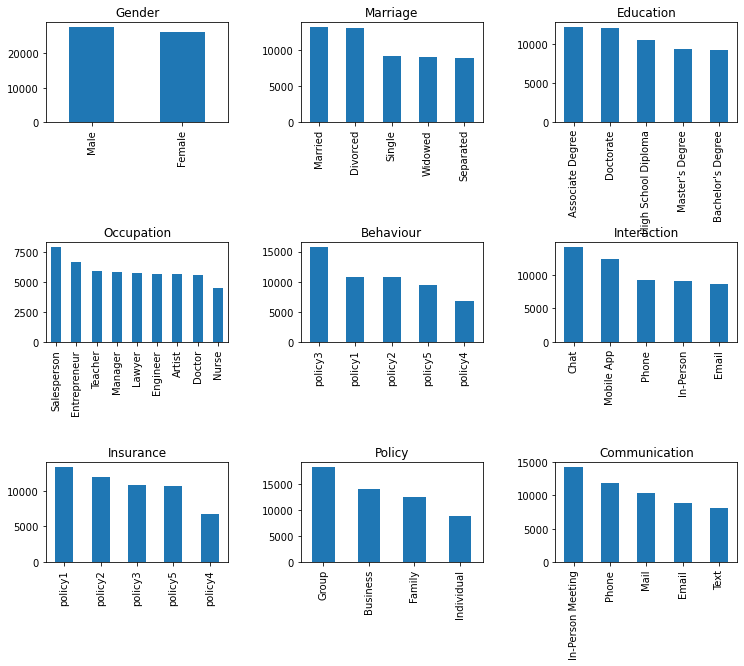

In [153]:
## Visualizing Categorical variables
plt.subplot(531)
cat_df['Gender'].value_counts().plot(kind='bar', title='Gender', figsize=(12,8))
plt.subplot(532)
cat_df['Marital Status'].value_counts().plot(kind='bar', title='Marriage', figsize=(12,8))
plt.subplot(533)
cat_df['Education Level'].value_counts().plot(kind='bar', title='Education', figsize=(12,8))
plt.subplot(534)
cat_df['Occupation'].value_counts().plot(kind='bar', title='Occupation', figsize=(12,8))
plt.subplot(535)
cat_df['Behavioral Data'].value_counts().plot(kind='bar', title='Behaviour', figsize=(12,8))
plt.subplot(536)
cat_df['Interaction Medium'].value_counts().plot(kind='bar', title='Interaction', figsize=(12,8))
plt.subplot(537)
cat_df['Insurance'].value_counts().plot(kind='bar', title='Insurance', figsize=(12,8))
plt.subplot(538)
cat_df['Policy Type'].value_counts().plot(kind='bar', title='Policy', figsize=(12,8))
plt.subplot(539)
cat_df['Preferred Communication Channel'].value_counts().plot(kind='bar', title='Communication', figsize=(12,8))
plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=1.8, wspace=0.4, hspace=1.2)

plt.show()

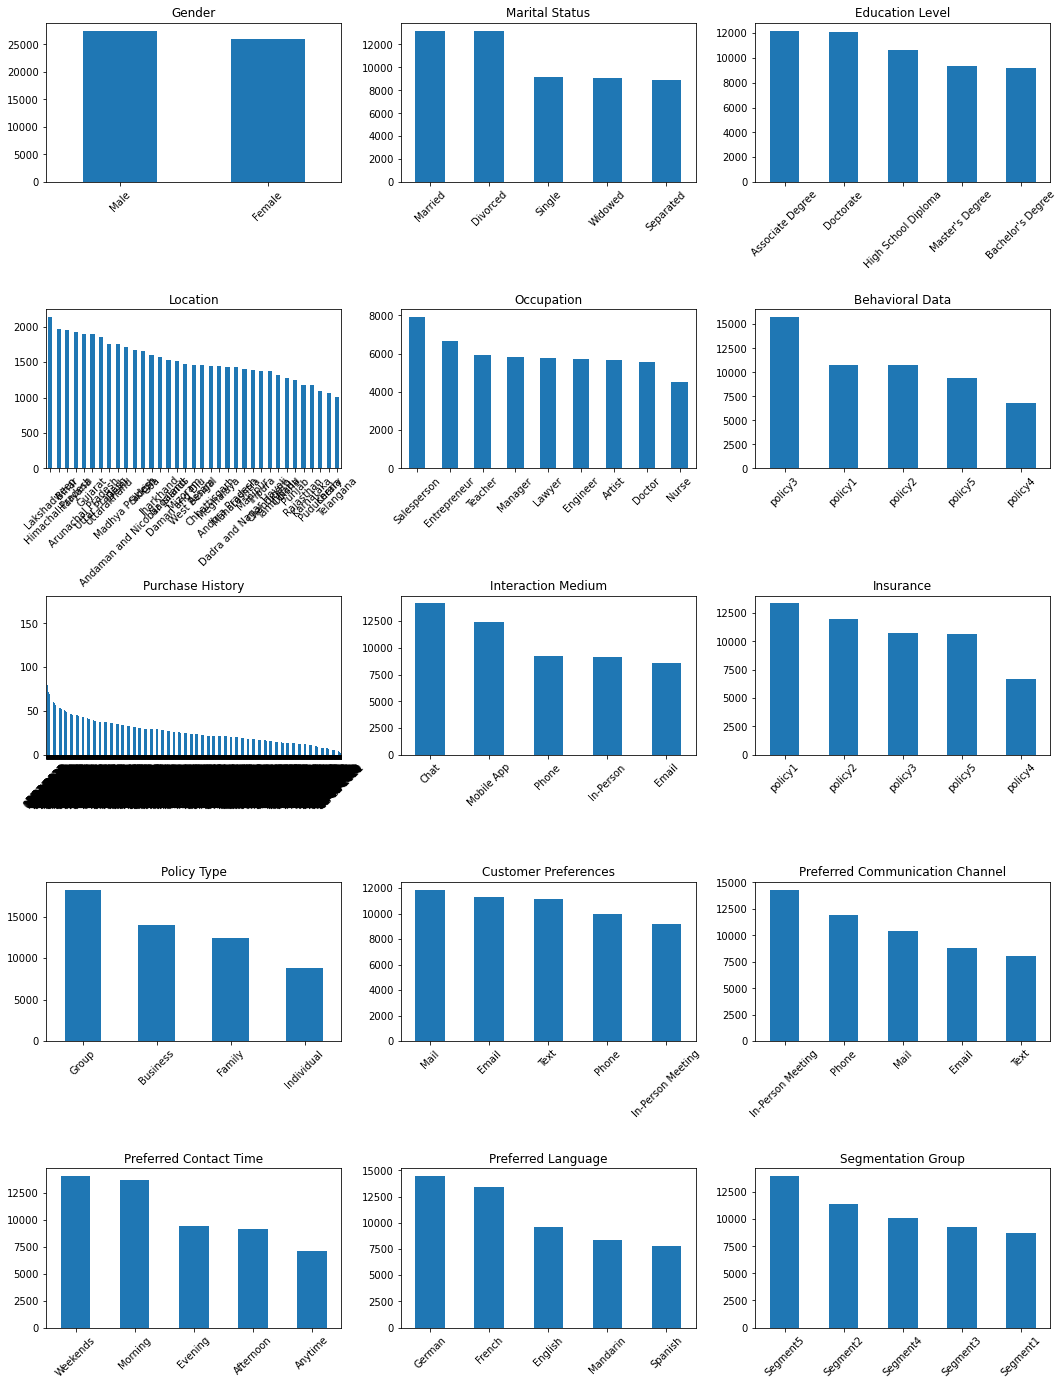

In [175]:
import matplotlib.pyplot as plt

# Create subplots
fig, axes = plt.subplots(5, 3, figsize=(18, 24))

# Flatten the axes array to iterate over it properly
axes = axes.flatten()

# Plot each category
for ax, category in zip(axes, cat_df.columns):
    cat_df[category].value_counts().plot(kind='bar', ax=ax, title=category)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels for better readability

plt.subplots_adjust(hspace=0.8)

# Show the plots
plt.show()


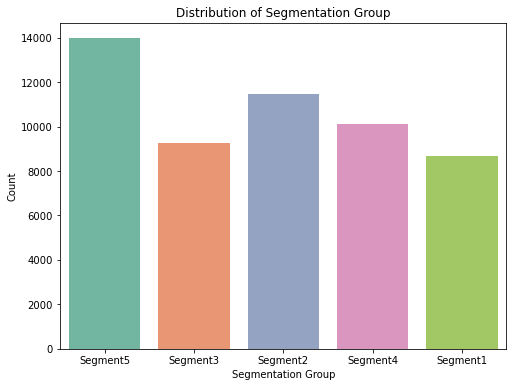

In [224]:
plt.figure(figsize=(8, 6))
sns.countplot(data=cs_df, x='Segmentation Group', palette='Set2')
plt.title('Distribution of Segmentation Group')
plt.xlabel('Segmentation Group')
plt.ylabel('Count')
plt.show()

In [176]:
# Numerical Columns
num_df.columns

Index(['Age', 'Income Level', 'Coverage Amount', 'Premium Amount'], dtype='object')

In [181]:
num_df['Age'].nunique()

53

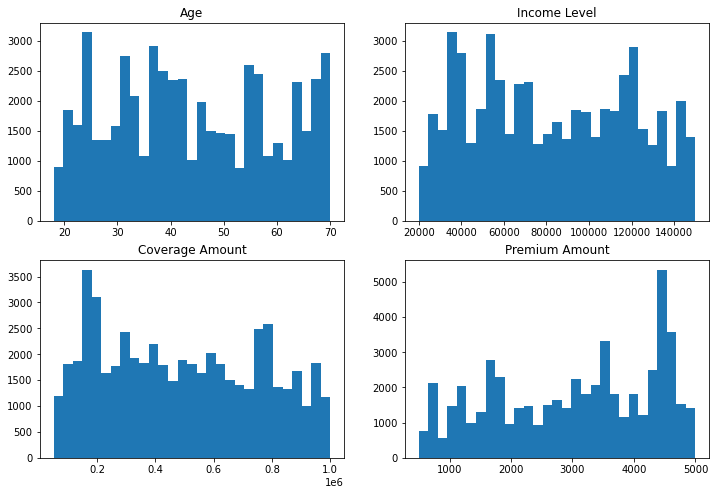

In [186]:
## Visualizations
## Histogram
plt.figure(figsize=(12,8))
for i, col in enumerate(num_df.columns):
    plt.subplot(2,2,i+1)
    plt.hist(num_df[col],bins = 29)
    plt.title(col)
    
plt.show()

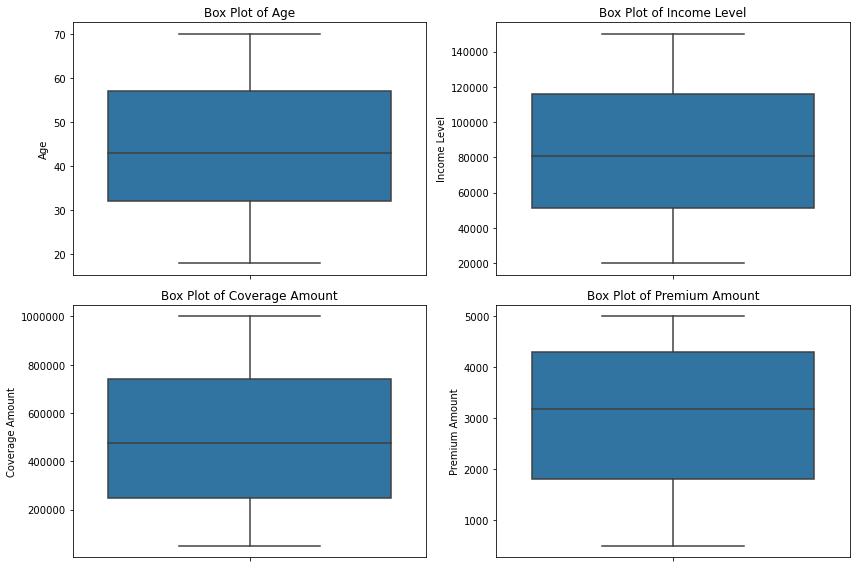

In [192]:
#Box Plots

# Set up the figure and axis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical variable and create a box plot
for i, col in enumerate(num_df.columns):
    sns.boxplot(y=col, data=num_df, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')
    
    # Format y-axis tick labels to show original values
    axes[i].ticklabel_format(style='plain', axis='y')  # Disable scientific notation for y-axis

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


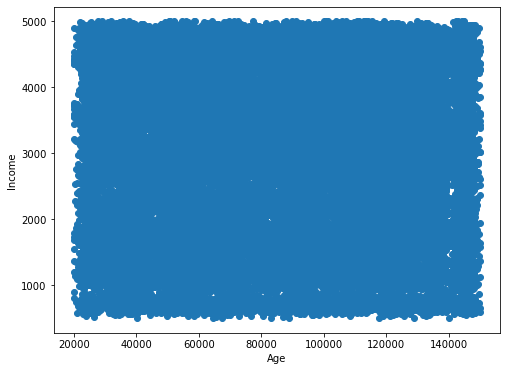

In [199]:
# Scatter Plots
plt.figure(figsize=(8,6))
plt.scatter(num_df['Income Level'],num_df['Premium Amount'])
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

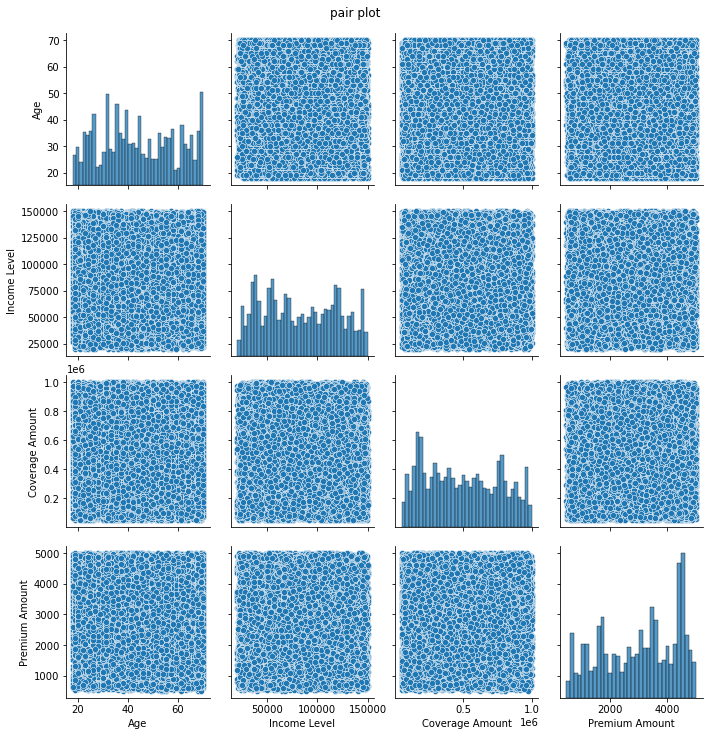

In [202]:
#Pair Plot
sns.pairplot(num_df)
plt.suptitle('pair plot', y = 1.02)
plt.show()

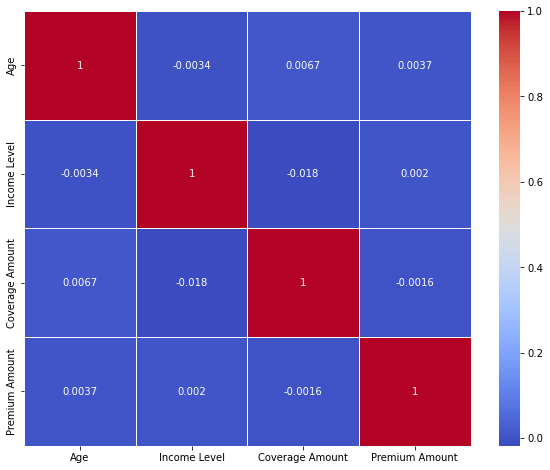

In [204]:
#Heatmap (Correlation)
plt.figure(figsize=(10,8))
sns.heatmap(num_df.corr(),annot = True, cmap = 'coolwarm', linewidth = 0.5)
plt.show()

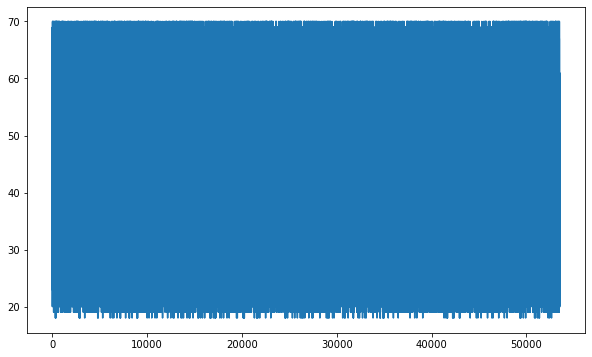

In [207]:
# Line Plot
plt.figure(figsize=(10, 6))
plt.plot(num_df['Age'])
plt.show()



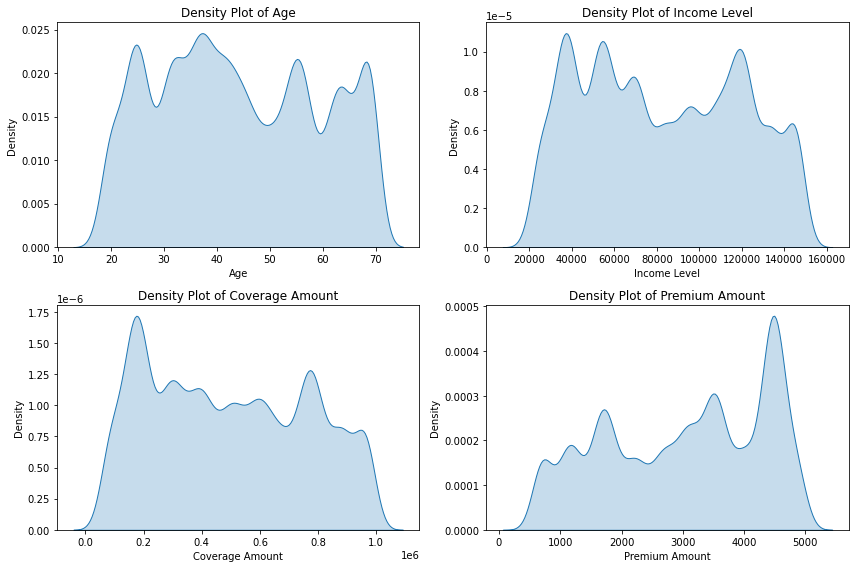

In [217]:
# Set up the figure and axis
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each numerical variable and create a density plot
for i, col in enumerate(num_df.columns):
    sns.kdeplot(data=num_df[col], ax=axes[i], fill=True)
    axes[i].set_title(f'Density Plot of {col}')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


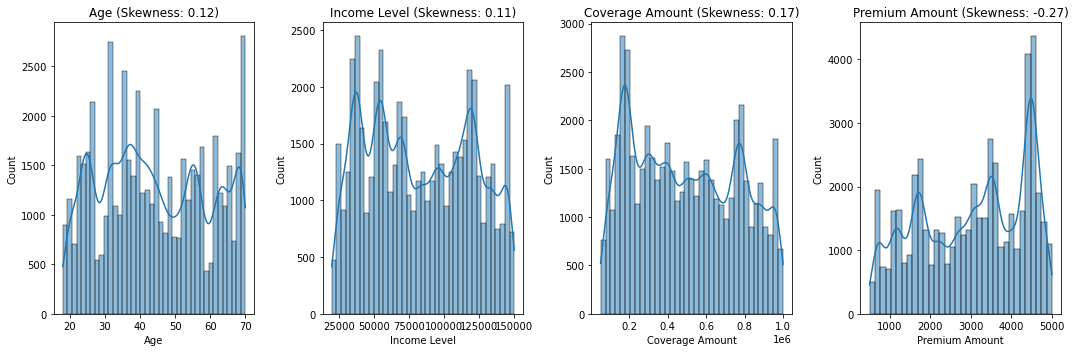

In [220]:
# Set up the figure and axis
fig, axes = plt.subplots(1, len(num_df.columns), figsize=(15, 5))

# Loop through each numerical variable and create a histogram or density plot
for i, col in enumerate(num_df.columns):
    sns.histplot(num_df[col], kde=True, ax=axes[i])
    axes[i].set_title(f'{col} (Skewness: {num_df[col].skew():.2f})')
    axes[i].set_xlabel(col)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


In [225]:
## lets try simple classification technique to classify customer into segments
cs_df.head()

,Age,Gender,Marital Status,Education Level,Location,Occupation,Income Level,Behavioral Data,Purchase History,Interaction Medium,Insurance,Coverage Amount,Premium Amount,Policy Type,Customer Preferences,Preferred Communication Channel,Preferred Contact Time,Preferred Language,Segmentation Group
0,23,Female,Married,Associate Degree,Mizoram,Entrepreneur,70541,policy5,04-10-2018,Phone,policy2,366603,2749,Group,Email,In-Person Meeting,Afternoon,English,Segment5
1,26,Male,Widowed,Doctorate,Goa,Manager,54168,policy5,11-06-2018,Chat,policy1,780236,1966,Group,Mail,In-Person Meeting,Morning,French,Segment5
2,29,Female,Single,Associate Degree,Rajasthan,Entrepreneur,73899,policy5,06-05-2021,Email,policy3,773926,4413,Group,Email,Mail,Evening,German,Segment3
3,20,Male,Divorced,Bachelor's Degree,Sikkim,Entrepreneur,63381,policy5,09-02-2018,Chat,policy2,787815,4342,Family,Text,In-Person Meeting,Anytime,French,Segment3
4,25,Female,Separated,Bachelor's Degree,West Bengal,Manager,38794,policy1,09-10-2018,Chat,policy4,366506,1276,Family,Email,Text,Weekends,English,Segment2


In [231]:
cs_df['Segmentation Group'].value_counts()/len(cs_df) * 100

Segment5    26.121900
Segment2    21.385717
Segment4    18.924172
Segment3    17.339215
Segment1    16.228997
Name: Segmentation Group, dtype: float64

*Case of class Imbalance*

In [239]:
X = cs_df[['Age','Income Level','Coverage Amount','Premium Amount']]
y = cs_df['Segmentation Group']

In [240]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify = y, test_size = 0.2, random_state = 42)

In [242]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Initialize the Logistic Regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
# Predict the labels for the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
train_accuracy = accuracy_score(y_train, y_pred_train)
print("Train Accuracy:", train_accuracy)
accuracy = accuracy_score(y_test, y_pred)
print("Test Accuracy:", accuracy)


Train Accuracy: 0.26122611092939585
Test Accuracy: 0.2611905429399122


In [ ]:
# FInd correlation of segment with all features and perform dimension reduction